In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv(r"C:\Users\jkalebay\OneDrive - Johnson Controls\Desktop\Project Folder\heart.csv")

# Quick look at the data
print(df.head())
print(df.info())
print(df['target'].value_counts())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 

In [2]:
print(df.isnull().sum())


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [3]:
X = df.drop('target', axis=1)
y = df['target']


In [11]:
%pip install scikit-learn xgboost pandas numpy



   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.5/101.7 MB 6.8 MB/s eta 0:00:15
    --------------------------------------- 2.1/101.7 MB 7.3 MB/s eta 0:00:14
   - -------------------------------------- 3.9/101.7 MB 7.7 MB/s eta 0:00:13
   -- ------------------------------------- 5.5/101.7 MB 7.7 MB/s eta 0:00:13
   -- ------------------------------------- 6.0/101.7 MB 7.8 MB/s eta 0:00:13
   -- ------------------------------------- 6.8/101.7 MB 6.0 MB/s eta 0:00:16
   -- ------------------------------------- 7.1/101.7 MB 6.0 MB/s eta 0:00:16
   --- ------------------------------------ 8.1/101.7 MB 5.3 MB/s eta 0:00:18
   --- ------------------------------------ 8.7/101.7 MB 5.4 MB/s eta 0:00:18
   --- ------------------------------------ 8.7/101.7 MB 5.4 MB/s eta 0:00:18
   ---- ----------------------------------- 10.5/101.7 MB 4.9 MB/s eta 0:00:19
   ---- ----------------------------------- 10.5/101.7 MB 4.9 MB/s eta


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [23]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
y_prob_lr = lr.predict_proba(X_test)[:,1]

print("Logistic Regression Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("AUC:", roc_auc_score(y_test, y_prob_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("F1:", f1_score(y_test, y_pred_lr))
print("MCC:", matthews_corrcoef(y_test, y_pred_lr))


Logistic Regression Metrics:
Accuracy: 0.8097560975609757
AUC: 0.9298095238095239
Precision: 0.7619047619047619
Recall: 0.9142857142857143
F1: 0.8311688311688312
MCC: 0.630908308763638


In [24]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)
y_prob_dt = dt.predict_proba(X_test)[:,1]

print("Decision Tree Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("AUC:", roc_auc_score(y_test, y_prob_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("Recall:", recall_score(y_test, y_pred_dt))
print("F1:", f1_score(y_test, y_pred_dt))
print("MCC:", matthews_corrcoef(y_test, y_pred_dt))


Decision Tree Metrics:
Accuracy: 0.9853658536585366
AUC: 0.9857142857142858
Precision: 1.0
Recall: 0.9714285714285714
F1: 0.9855072463768116
MCC: 0.9711511393019859


In [25]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)
y_prob_dt = dt.predict_proba(X_test)[:,1]

print("Decision Tree Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("AUC:", roc_auc_score(y_test, y_prob_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("Recall:", recall_score(y_test, y_pred_dt))
print("F1:", f1_score(y_test, y_pred_dt))
print("MCC:", matthews_corrcoef(y_test, y_pred_dt))


Decision Tree Metrics:
Accuracy: 0.9853658536585366
AUC: 0.9857142857142858
Precision: 1.0
Recall: 0.9714285714285714
F1: 0.9855072463768116
MCC: 0.9711511393019859


In [26]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)
y_prob_knn = knn.predict_proba(X_test)[:,1]

print("KNN Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("AUC:", roc_auc_score(y_test, y_prob_knn))
print("Precision:", precision_score(y_test, y_pred_knn))
print("Recall:", recall_score(y_test, y_pred_knn))
print("F1:", f1_score(y_test, y_pred_knn))
print("MCC:", matthews_corrcoef(y_test, y_pred_knn))


KNN Metrics:
Accuracy: 0.8634146341463415
AUC: 0.9629047619047618
Precision: 0.8737864077669902
Recall: 0.8571428571428571
F1: 0.8653846153846154
MCC: 0.7269351910363394


In [27]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred_nb = nb.predict(X_test)
y_prob_nb = nb.predict_proba(X_test)[:,1]

print("Naive Bayes Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("AUC:", roc_auc_score(y_test, y_prob_nb))
print("Precision:", precision_score(y_test, y_pred_nb))
print("Recall:", recall_score(y_test, y_pred_nb))
print("F1:", f1_score(y_test, y_pred_nb))
print("MCC:", matthews_corrcoef(y_test, y_pred_nb))


Naive Bayes Metrics:
Accuracy: 0.8292682926829268
AUC: 0.9042857142857142
Precision: 0.8070175438596491
Recall: 0.8761904761904762
F1: 0.8401826484018264
MCC: 0.6601634114374199


In [28]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:,1]

print("Random Forest Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("AUC:", roc_auc_score(y_test, y_prob_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1:", f1_score(y_test, y_pred_rf))
print("MCC:", matthews_corrcoef(y_test, y_pred_rf))


Random Forest Metrics:
Accuracy: 1.0
AUC: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0
MCC: 1.0


In [29]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)[:,1]

print("XGBoost Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("AUC:", roc_auc_score(y_test, y_prob_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb))
print("Recall:", recall_score(y_test, y_pred_xgb))
print("F1:", f1_score(y_test, y_pred_xgb))
print("MCC:", matthews_corrcoef(y_test, y_pred_xgb))


XGBoost Metrics:
Accuracy: 1.0
AUC: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0
MCC: 1.0


In [ ]:
# Collect metrics into a list of dicts
results = []

# Logistic Regression
results.append({
    "Model": "Logistic Regression",
    "Accuracy": accuracy_score(y_test, y_pred_lr),
    "AUC": roc_auc_score(y_test, y_prob_lr),
    "Precision": precision_score(y_test, y_pred_lr),
    "Recall": recall_score(y_test, y_pred_lr),
    "F1": f1_score(y_test, y_pred_lr),
    "MCC": matthews_corrcoef(y_test, y_pred_lr)
})

# Decision Tree
results.append({
    "Model": "Decision Tree",
    "Accuracy": accuracy_score(y_test, y_pred_dt),
    "AUC": roc_auc_score(y_test, y_prob_dt),
    "Precision": precision_score(y_test, y_pred_dt),
    "Recall": recall_score(y_test, y_pred_dt),
    "F1": f1_score(y_test, y_pred_dt),
    "MCC": matthews_corrcoef(y_test, y_pred_dt)
})

# KNN
results.append({
    "Model": "KNN",
    "Accuracy": accuracy_score(y_test, y_pred_knn),
    "AUC": roc_auc_score(y_test, y_prob_knn),
    "Precision": precision_score(y_test, y_pred_knn),
    "Recall": recall_score(y_test, y_pred_knn),
    "F1": f1_score(y_test, y_pred_knn),
    "MCC": matthews_corrcoef(y_test, y_pred_knn)
})

# Naive Bayes
results.append({
    "Model": "Naive Bayes",
    "Accuracy": accuracy_score(y_test, y_pred_nb),
    "AUC": roc_auc_score(y_test, y_prob_nb),
    "Precision": precision_score(y_test, y_pred_nb),
    "Recall": recall_score(y_test, y_pred_nb),
    "F1": f1_score(y_test, y_pred_nb),
    "MCC": matthews_corrcoef(y_test, y_pred_nb)
})

# Random Forest
results.append({
    "Model": "Random Forest",
    "Accuracy": accuracy_score(y_test, y_pred_rf),
    "AUC": roc_auc_score(y_test, y_prob_rf),
    "Precision": precision_score(y_test, y_pred_rf),
    "Recall": recall_score(y_test, y_pred_rf),
    "F1": f1_score(y_test, y_pred_rf),
    "MCC": matthews_corrcoef(y_test, y_pred_rf)
})

# XGBoost
results.append({
    "Model": "XGBoost",
    "Accuracy": accuracy_score(y_test, y_pred_xgb),
    "AUC": roc_auc_score(y_test, y_prob_xgb),
    "Precision": precision_score(y_test, y_pred_xgb),
    "Recall": recall_score(y_test, y_pred_xgb),
    "F1": f1_score(y_test, y_pred_xgb),
    "MCC": matthews_corrcoef(y_test, y_pred_xgb)
})

# Convert to DataFrame
results_df = pd.DataFrame(results)
results_df


,Model,Accuracy,AUC,Precision,Recall,F1,MCC
0,Logistic Regression,0.809756,0.929810,0.761905,0.914286,0.831169,0.630908
1,Decision Tree,0.985366,0.985714,1.000000,0.971429,0.985507,0.971151
2,KNN,0.863415,0.962905,0.873786,0.857143,0.865385,0.726935
3,Naive Bayes,0.829268,0.904286,0.807018,0.876190,0.840183,0.660163
4,Random Forest,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
5,XGBoost,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
%pip install matplotlib seaborn


   ---------------------------------------- 0.0/8.3 MB ? eta -:--:--
   --- ------------------------------------ 0.8/8.3 MB 4.2 MB/s eta 0:00:02
   ---------- ----------------------------- 2.1/8.3 MB 5.4 MB/s eta 0:00:02
   ------------ --------------------------- 2.6/8.3 MB 5.6 MB/s eta 0:00:02
   ----------------- ---------------------- 3.7/8.3 MB 5.3 MB/s eta 0:00:01
   ----------------- ---------------------- 3.7/8.3 MB 5.3 MB/s eta 0:00:01
   ------------------- -------------------- 3.9/8.3 MB 3.3 MB/s eta 0:00:02
   -------------------- ------------------- 4.2/8.3 MB 3.0 MB/s eta 0:00:02
   ------------------------- -------------- 5.2/8.3 MB 3.1 MB/s eta 0:00:01
   ----------------------------------- ---- 7.3/8.3 MB 3.9 MB/s eta 0:00:01
   ---------------------------------------- 8.3/8.3 MB 4.2 MB/s  0:00:01
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ------------- -------------------------- 0.8/2.3 MB 7.3 MB/s eta 0:00:01
   --------------------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


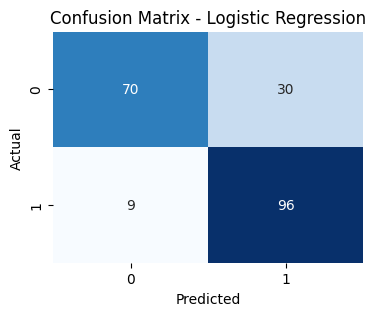

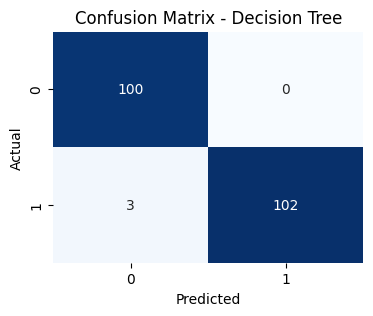

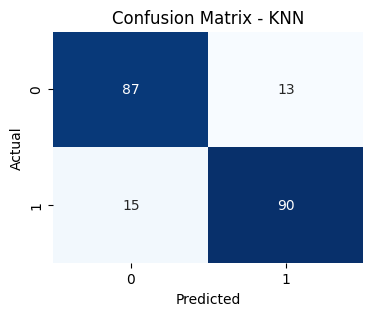

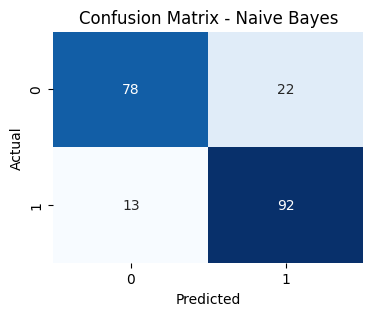

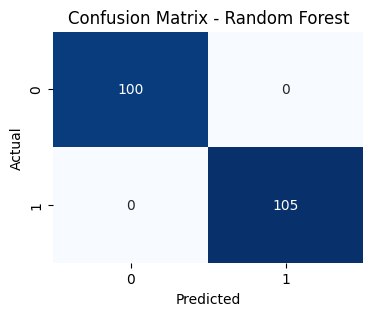

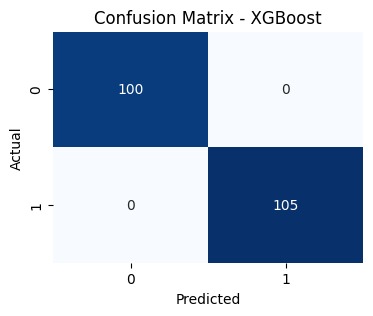

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Dictionary of trained models (make sure you reuse the fitted ones: lr, dt, knn, nb, rf, xgb_model)
trained_models = {
    "Logistic Regression": lr,
    "Decision Tree": dt,
    "KNN": knn,
    "Naive Bayes": nb,
    "Random Forest": rf,
    "XGBoost": xgb_model
}

for name, model in trained_models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


In [34]:
import joblib
import os

# Define the folder path
model_folder = r"C:\Users\jkalebay\OneDrive - Johnson Controls\Desktop\Project Folder\model"

# Ensure folder exists
if not os.path.exists(model_folder):
    os.makedirs(model_folder)

# Save each trained model
trained_models = {
    "Logistic Regression": lr,
    "Decision Tree": dt,
    "KNN": knn,
    "Naive Bayes": nb,
    "Random Forest": rf,
    "XGBoost": xgb_model
}

for name, model in trained_models.items():
    filename = os.path.join(model_folder, f"{name.replace(' ', '_')}.pkl")
    joblib.dump(model, filename)
    print(f"Saved: {filename}")



Saved: C:\Users\jkalebay\OneDrive - Johnson Controls\Desktop\Project Folder\model\Logistic_Regression.pkl
Saved: C:\Users\jkalebay\OneDrive - Johnson Controls\Desktop\Project Folder\model\Decision_Tree.pkl
Saved: C:\Users\jkalebay\OneDrive - Johnson Controls\Desktop\Project Folder\model\KNN.pkl
Saved: C:\Users\jkalebay\OneDrive - Johnson Controls\Desktop\Project Folder\model\Naive_Bayes.pkl
Saved: C:\Users\jkalebay\OneDrive - Johnson Controls\Desktop\Project Folder\model\Random_Forest.pkl
Saved: C:\Users\jkalebay\OneDrive - Johnson Controls\Desktop\Project Folder\model\XGBoost.pkl


In [43]:
loaded_rf1 = joblib.load(os.path.join(model_folder, "Logistic_Regression.pkl"))
print(loaded_rf1.predict(X_test[:10]))

[0 0 0 1 0 0 1 1 1 0]


In [44]:
loaded_rf2 = joblib.load(os.path.join(model_folder, "Decision_Tree.pkl"))
print(loaded_rf2.predict(X_test[:10]))

[0 1 0 1 0 0 1 0 1 1]


In [45]:
loaded_rf3 = joblib.load(os.path.join(model_folder, "KNN.pkl"))
print(loaded_rf3.predict(X_test[:10]))

[0 0 0 1 0 0 0 0 1 0]


In [46]:
loaded_rf4 = joblib.load(os.path.join(model_folder, "Naive_Bayes.pkl"))
print(loaded_rf4.predict(X_test[:10]))

[0 0 0 1 0 0 1 0 1 0]


In [47]:
loaded_rf5 = joblib.load(os.path.join(model_folder, "XGBoost.pkl"))
print(loaded_rf5.predict(X_test[:10]))

[0 1 0 1 0 0 1 0 1 1]


In [48]:
loaded_rf6 = joblib.load(os.path.join(model_folder, "Random_Forest.pkl"))
print(loaded_rf6.predict(X_test[:10]))


[0 1 0 1 0 0 1 0 1 1]
